# Рабочая тетрадь №4 Григорьев Максим Эдуардович КРБО-01-21

# 1.1.3 Задание
### ***Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.***

### ***Постройте эктраполяцию полинома первой степени.***

In [6]:
import numpy as np
delta = 1.0
x = np.linspace(-5, 5, 11)
y = x + delta * (np.random.rand(11) - 0.5)
x += delta * (np.random.rand(11) - 0.5)

x.tofile('x.txt', '\n')
y.tofile('y.txt', '\n')

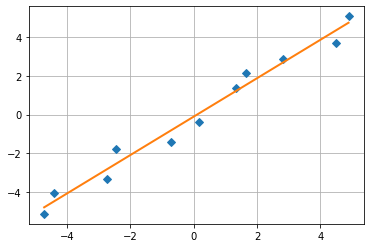

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.fromfile('x.txt', float, sep='\n')
y = np.fromfile('y.txt', float, sep='\n')

m = np.vstack((x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
plt.plot(x, y, 'D')
plt.plot(x, s[0] * x + s[1], '-', lw=2)
plt.grid()

### ***Постройте эктраполяцию полинома второй степени.***

In [8]:
import numpy as np

delta = 1.0
x = np.linspace(-5, 5, 11)
y = x ** 2 + delta * (np.random.rand(11) - 0.5)
x += delta * (np.random.rand(11) - 0.5)

x.tofile('x1.txt', '\n')
y.tofile('y1.txt', '\n')

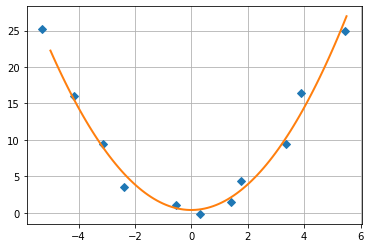

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.fromfile('x1.txt', float, sep='\n')
y = np.fromfile('y1.txt', float, sep='\n')

m = np.vstack((x ** 2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(-5, 5.5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()

### ***Постройте эктраполяцию полинома третьей степени.***

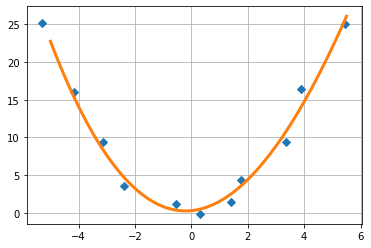

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.fromfile('x1.txt', float, sep='\n')
y = np.fromfile('y1.txt', float, sep='\n')


m = np.vstack((x ** 3, x ** 2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(-5, 5.5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()

# 1.1.5 Задание
### ***Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.***

[0.52249061 0.77788245 0.25548522]
0.00018307247047495088
0.09675557283942494


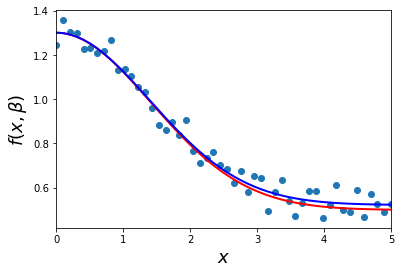

[0.51307007 0.79792145]
0.00011220620678570456
0.09866407800974417


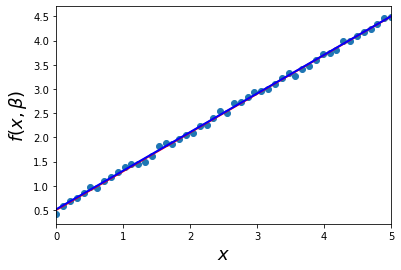

[0.55252504 0.7533238  0.25780051]
0.0001621817667616268
0.13524260876787034


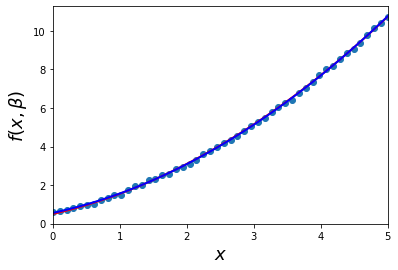

[1.99337318 2.99769034]
3.370743266596762e-05
0.0779464604839861


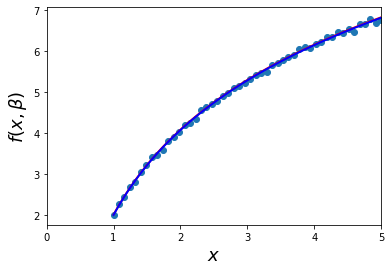

[2.00332526 2.99996   ]
9.175166328986758e-05
0.14007433519609755


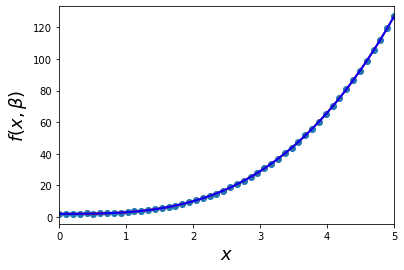

In [11]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt


beta = (0.5, 0.8, 0.25)

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
line_dev = sum(beta_cov[0])
print(line_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


beta = (0.5, 0.8)

def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
line_dev = sum(beta_cov[0])
print(line_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

beta = (0.5, 0.8, 0.25)

def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
line_dev = sum(beta_cov[0])
print(line_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

beta = (2, 3)

def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
line_dev = sum(beta_cov[0])
print(line_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

beta = (2, 3)

def f(x, b0, b1):
    return b0 + x ** b1

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
line_dev = sum(beta_cov[0])
print(line_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 1.2.1 Задание
### ***Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv). Найдите коэффициенты линии регрессии. Постройте прогноз.***

26780.099150628186
[9312.57512673]


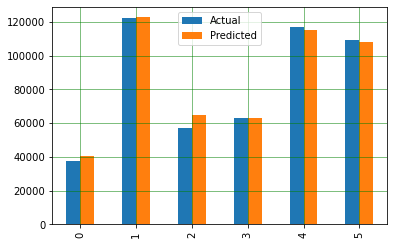

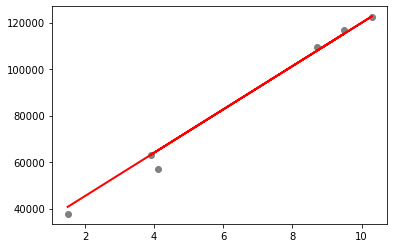

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# 1.3.1 Задание
### ***Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.***

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'

dataset = pd.read_csv(url)
X = dataset[['Average_income','Paved_Highways','Population_Driver_licence(%)', 'Petrol_Consumption']]
y = dataset['Petrol_tax']
x = np.array([1, 2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coef_df)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print('Mean Square Error', metrics.mean_squared_error(y_test, y_pred))

                              Coefficient
Average_income                  -0.000107
Paved_Highways                  -0.000152
Population_Driver_licence(%)     2.110354
Petrol_Consumption              -0.005058
    Actual  Predicted
29     9.0   7.962130
4      8.0   9.252421
26     8.0   7.763302
30     7.0   7.481077
32     8.0   7.696914
37     7.0   7.003346
34     8.0   8.370428
40     7.0   7.885720
7      8.0   8.646102
10     8.0   7.527290
Mean Square Error 0.4587686097483944
